# Python Programming for Linear Algebra

## Practice Notebook

By Shinas Shaji

### Arrays as Vectors and Matrices

In NumPy, the `numpy.ndarray` is used to represent vectors and matrices. Some knowledge of NumPy is expected for this session.

In [1]:
# %matplotlib ipympl

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# plt.ion()
# matplotlib.is_interactive()

#### Identity Matrices

Behaves similar to `1` in scalar operations.

In [2]:
identity = np.identity(2)
print(f"Identity matrix: \n{identity}")

Identity matrix: 
[[1. 0.]
 [0. 1.]]


The inverse can be found using `numpy.linalg.inv()`.

In [3]:
identity_inv = np.linalg.inv(identity)
print(f"Identity inverse: \n{identity_inv}")

print(f"identity @ identity_inv: \n{identity @ identity_inv}")

Identity inverse: 
[[1. 0.]
 [0. 1.]]
identity @ identity_inv: 
[[1. 0.]
 [0. 1.]]


#### Create a simple matrix

Create the following matrix:

$$
A = 
\begin{bmatrix}
2 & 1 \\
1 & 2
\end{bmatrix}
$$

In [4]:
a = np.array(
    [[2.0, 1.0],
    [1.0, 2.0]]
)
print(f"a: \n{a}")
print(f"a.dtype: \n{a.dtype}")

a: 
[[2. 1.]
 [1. 2.]]
a.dtype: 
float64


In [5]:
a = np.array((2.0, 1.0))
a = np.vstack((a, a[::-1]))
print(f"a: \n{a}")

a: 
[[2. 1.]
 [1. 2.]]


A matrix multiplied by identity remains the same. Matrix multiplication can be done in NumPy in a number of different ways, including `@`, `numpy.matmul()` and `np.dot()`.

In [6]:
print(f"identity @ a: \n{identity @ a}")

identity @ a: 
[[2. 1.]
 [1. 2.]]


Writing a function to draw vectors in a nice square-ish aspect plot:

In [7]:
def init_plot():
    plt.figure()
    plt.gca().set_aspect('equal', adjustable='datalim')
    plt.grid()

    return None

def plot_vector(start: np.ndarray, 
                end: np.ndarray, 
                ):
    plt.plot((start[0], end[0]), (start[1], end[1]))

    # Updates the figure
    plt.draw()

    return None

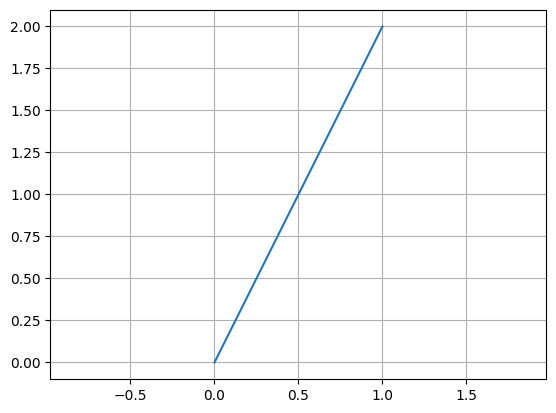

In [8]:
start = np.array([0.0, 0.0])
end = np.array([1.0, 2.0])

init_plot()
plot_vector(start, end)

The origin is assumed to be the start point of the vector. Try translating a vector and plotting the translation. Translation is performed by addition of vectors.

In [9]:
origin = np.zeros(2)
print(f"origin: \n{origin}")

origin: 
[0. 0.]


Create two vectors and add them to get a translated vector.

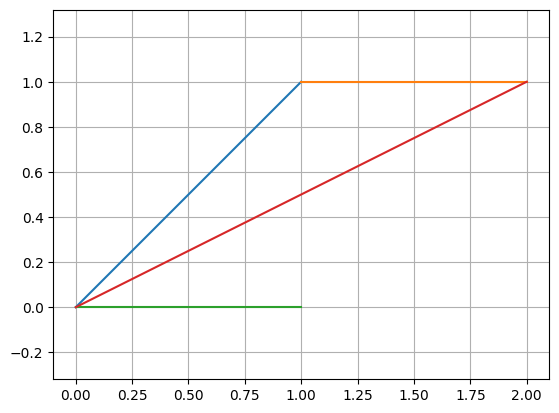

In [10]:
vector_a = np.array((1.0, 1.0))
vector_b = np.array((1.0, 0.0))

vector_c = vector_a + vector_b

init_plot()
plot_vector(origin, vector_a)
plot_vector(vector_a, vector_c)
plot_vector(origin, vector_b)
plot_vector(origin, vector_c)

#### Normalizing Vectors

norm before normalization: 1.4142135623730951


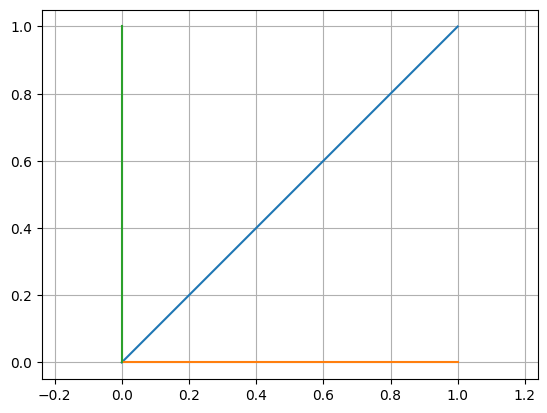

In [11]:
vector_a = np.array((1.0, 1.0))
print(f"norm before normalization: {np.linalg.norm(vector_a)}")

vector_b = np.array((0.0, 1.0))
vector_c = np.array((1.0, 0.0))

init_plot()
plot_vector(origin, vector_a)
plot_vector(origin, vector_c)
plot_vector(origin, vector_b)

norm after normalization: 0.9999999999999999


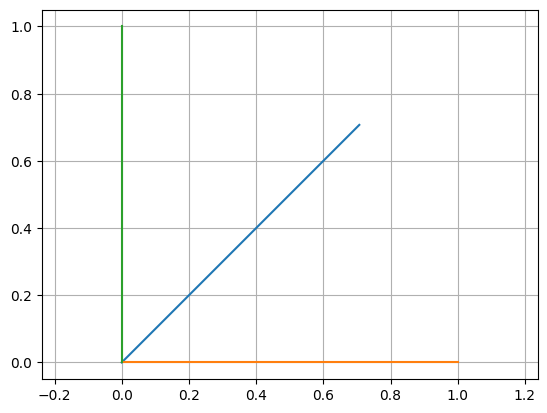

In [12]:
# Normalizing to be of length 1
vector_a /= np.linalg.norm(vector_a)

print(f"norm after normalization: {np.linalg.norm(vector_a)}")

init_plot()
plot_vector(origin, vector_a)
plot_vector(origin, vector_c)
plot_vector(origin, vector_b)

Transform these vectors by the matrix we created earlier. Transformation is performed by the dot product (or matrix multiplication), given by:

$$ \mathbf{x}^\prime = A \cdot \mathbf{x}$$

Note that $\mathbf{x}$ is a column vector.

In [13]:
a = np.array(
    [[2.0, 1.0],
    [1.0, 2.0]]
)
print(f"a: \n{a}")
print(f"a.shape: \n{a.shape}")

a: 
[[2. 1.]
 [1. 2.]]
a.shape: 
(2, 2)


In [14]:
# Stack them to transform in one step
vectors = np.vstack([
    vector_a,
    vector_b,
    vector_c,
])
print(f"vectors: \n{vectors}")
print(f"vectors.shape: \n{vectors.shape}")

# Need column vectors for transformation
vectors = vectors.T
print(f"vectors: \n{vectors}")
print(f"vectors.shape: \n{vectors.shape}")

transformed_vectors = (a @ vectors).T
print(f"transformed_vectors: \n{transformed_vectors}")
print(f"transformed_vectors.shape: \n{transformed_vectors.shape}")

vectors: 
[[0.70710678 0.70710678]
 [0.         1.        ]
 [1.         0.        ]]
vectors.shape: 
(3, 2)
vectors: 
[[0.70710678 0.         1.        ]
 [0.70710678 1.         0.        ]]
vectors.shape: 
(2, 3)
transformed_vectors: 
[[2.12132034 2.12132034]
 [1.         2.        ]
 [2.         1.        ]]
transformed_vectors.shape: 
(3, 2)


Now plot these vectors.

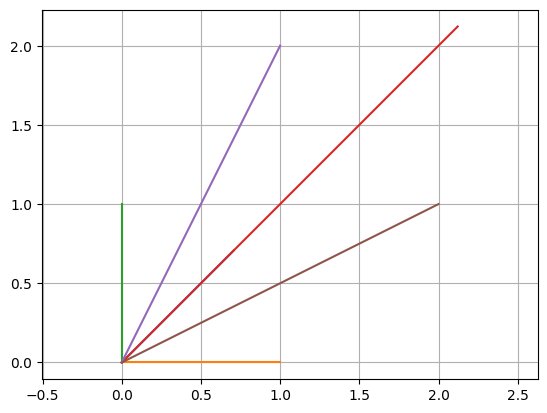

In [15]:
init_plot()

# The original vectors
plot_vector(origin, vector_a)
plot_vector(origin, vector_c)
plot_vector(origin, vector_b)

# The rows of the transformed vectors are taken in each iteration
for transformed_vector in transformed_vectors:
    plot_vector(origin, transformed_vector)

#### What does this mean?

It can be written that 

$$ \mathbf{x}^\prime = A \mathbf{x} $$

$$
\begin{bmatrix}
{x}^\prime \\
{y}^\prime
\end{bmatrix}
=
\begin{bmatrix}
2 & 1 \\
1 & 2
\end{bmatrix}
\begin{bmatrix}
{x} \\
{y}
\end{bmatrix}
$$

This means:

$${x}^\prime = 2 {x} + {y}$$
$${y}^\prime = {x} + 2 {y}$$

This is a shear mapping combined with a uniform scaling.

Moving on to another linear transformation that preserves scale and whose matrices are composed of orthogonal, linearly independent columns - rotations. But before that, some theory on matrices and their types.

A scaling matrix looks like this:
$$
\begin{bmatrix}
2 & 0 \\
0 & 2
\end{bmatrix}
$$

#### Unitary and Orthogonal Matrices
Square matrices whose conjugate transpose (or transpose if real) is equal to their inverse.

A real matrix A is unitary if 
$$ A A^T = A^T A = I $$

- A real unitary matrix is an orthogonal matrix, and the product of two unitary matrices is also unitary.

- The columns of an orthogonal matrix are orthogonal or perpendicular to each other - this means that the dot product of two columns is 0.

- Unitary matrices preserve the length of vectors transformed by them. The columns of a unitary matrix have length 1; i.e., they are normalized.

#### Matrix Rank

This is the dimension of the vector space spanned by its columns, and is the number of linearly independent columns of the matrix.

It can be found from the number of singular values or eigenvalues that are greater than 0 or some tolerance above 0.

In NumPy, it can be found using `numpy.linalg.matrix_rank()`.

#### Determinant

The determinant, given by $\det (A)$, is a scalar value defined as a function of the elements of square matrices. Can be found using the Leibniz formula, or `numpy.linalg.det`.

- The determinant is nonzero for invertible matrices, i.e., matrices for which an inverse exists.

- The determinant is 0 for matrices that have linearly dependent columns or rows.

- Used in several computations - for example, in finding the eigenvalues and eigenvectors of a matrix by the characteristic formula $\det (A - \lambda I) = 0$.

The determinant of a 2D matrix can be found as:
$$
\begin{vmatrix}
a & b \\
c & d
\end{vmatrix} = 
ad - bc
$$

#### Invertibility and Singular Matrices

A matrix $A$ is invertible if there exists a matrix $B$ such that 

$$ A B = B A = I $$

- A square matrix that is not invertible is a singular or degenerate matrix. A non-square matrix is not invertible.

- A square matrix is singular when its determinant is 0, and has no inverse.

- For invertibility, $A$ must have full rank - all rows and columns must be linearly independent, and form a basis over the space $K^n$, where $K$ is a field ($\mathbf{R}$, for example), and n is the dimension of the matrix $A$.

- The transpose $A^T$ of an invertible matrix is also invertible.

### Rotation Matrices

A rotation matrix $ R $ describes how points in a space are rotated about the origin of a space (or a specific axis).

Notably, rotation matrices show the following properties:
- the columns and rows are orthogonal vectors, and hence $ R $ is orthogonal
- the determinant of $ R $ is 1, meaning it does not scale transformed vectors. Volume is conserved.
- the inverse of $R$ is its transpose $R^T$ - hence, it is unitary; i.e.,
$$R^{-1} = R^T$$
- rotations can be composed by multiplying rotation matrices.

A rotation in 2D can be represented by the following rotation matrix:

$$
R = 
\begin{bmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta
\end{bmatrix}
$$

Now, write a function that generates rotation matrices for a given angle (in rad).

In [16]:
def rotation_2d(theta) -> np.ndarray:
    rotation_matrix = np.zeros((2, 2))
    rotation_matrix[0, 0] = np.cos(theta)
    rotation_matrix[0, 1] = -np.sin(theta)
    rotation_matrix[1, 0] = np.sin(theta)
    rotation_matrix[1, 1] = np.cos(theta)

    return rotation_matrix

In [17]:
def func(param):
    var = param

    return var

return_value = func("hello")
print(return_value)

hello


In [18]:
with np.printoptions(suppress=True):
    rotation_matrix = rotation_2d(np.pi/4)
    print(rotation_matrix)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Rotate some vectors now.

rotation_matrix: 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
rotated_a: 
[0.70710678 0.70710678]
rotated_rotated_a: 
[1.79380389e-16 1.00000000e+00]


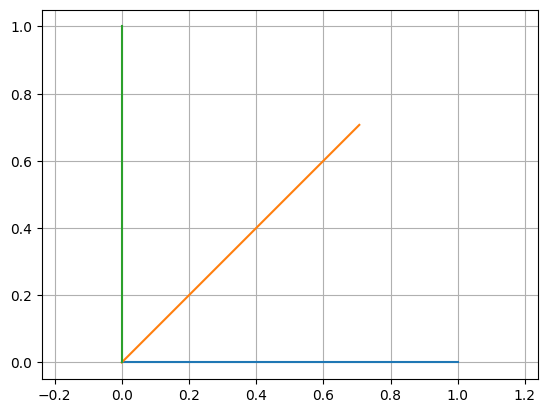

In [19]:
vector_a = np.array((1.0, 0.0))
rotation_matrix = rotation_2d(np.pi/4)
print(f"rotation_matrix: \n{rotation_matrix}")

rotated_a = rotation_matrix @ vector_a
print(f"rotated_a: \n{rotated_a}")

init_plot()
plot_vector(origin, vector_a)
plot_vector(origin, rotated_a)

rotated_rotated_a = rotation_matrix @ rotated_a
print(f"rotated_rotated_a: \n{rotated_rotated_a}")
plot_vector(origin, rotated_rotated_a)

Try an inverse rotation now.

inv_rotation_matrix: 
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
inv_rotated_a: 
[1. 0.]


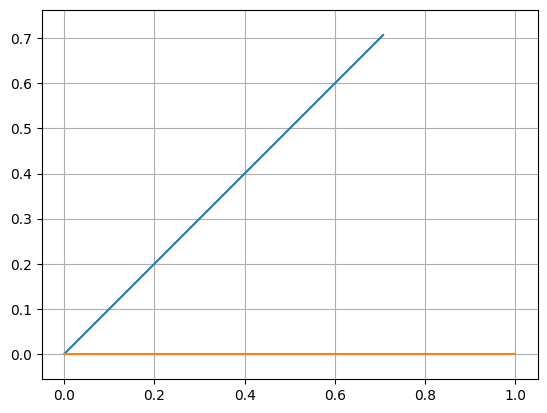

In [20]:
inv_rotation_matrix = rotation_matrix.T
print(f"inv_rotation_matrix: \n{inv_rotation_matrix}")

inv_rotated_a = inv_rotation_matrix @ rotated_a
print(f"inv_rotated_a: \n{inv_rotated_a}")

init_plot()
plot_vector(origin, rotated_a)
plot_vector(origin, inv_rotated_a)

How to check if a matrix is orthogonal? 

The dot product of columns are zero.

In [21]:
col_dot_product = rotation_matrix[:, 0] @ rotation_matrix[:, 1].T
print(f"col_dot_product: \n{col_dot_product}")

col_dot_product: 
0.0


More on transformations using homogeneous matrices, transformation frames and so on in Mathematics for Robotics and Control.

### Systems of Linear Equations

Systems of linear equations can be represented and solved as matrices.

Consider the following system:

$$ 2x + 3y = 7 $$
$$ x - y = 1 $$

This can be written in the form $A \mathbf{x} = \mathbf{b}$ as:

$$
\begin{bmatrix}
2 & 3 \\
1 & -1
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix} = 
\begin{bmatrix}
7 \\
1
\end{bmatrix}
$$

This can now be solved as:

$$ \mathbf{x} = A^{-1} \mathbf{b}$$

The inverse of a matrix can be found using `np.linalg.inv()`.

In [22]:
A = np.array([
    [2, 3],
    [1, -1],
])
b = np.array([
    [7],
    [1],
])

X = np.linalg.inv(A) @ b
print(f"solution X: \n{X}")

solution X: 
[[2.]
 [1.]]


Plot the lines to see the solution graphically.

The equation can now be written as:

$$ y = \frac{2x - 7}{-3} $$
$$ y = \frac{x - 1}{1} $$

In [23]:
# linspace creates an array of linearly spaced values:
x = np.linspace(-2, 7, 10)
x

array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.])

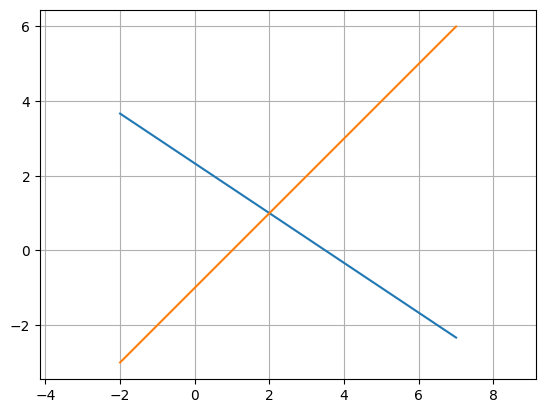

In [24]:
x = np.linspace(-2, 7, 10)
y_1 = (2*x - 7) / -3
y_2 = (x - 1) / 1

init_plot()
plt.plot(x, y_1);
plt.plot(x, y_2);

More on these methods in Mathematics for Robotics and Control.

## Exercise Time

#### Plot a circle

To practice polar-to-cartesian conversions. 

Polar coordinates are represented by $(r, \theta)$.

$$ x = r \cos \theta $$
$$ y = r \sin \theta $$

Also visualize the result.

In [25]:
points = 24
radius = 1.0
theta = np.linspace(0, 2*np.pi, points, endpoint=True)

print(f"theta: \n{theta}")

circle_x = radius * np.cos(theta)
circle_y = radius * np.sin(theta)

circle_points = np.vstack((circle_x, circle_y)).T
with np.printoptions(suppress=True):
    print(f"circle_points: \n{circle_points}")

theta: 
[0.         0.27318197 0.54636394 0.81954591 1.09272788 1.36590985
 1.63909182 1.91227379 2.18545576 2.45863773 2.7318197  3.00500167
 3.27818364 3.55136561 3.82454758 4.09772955 4.37091152 4.64409349
 4.91727546 5.19045743 5.4636394  5.73682137 6.01000334 6.28318531]
circle_points: 
[[ 1.          0.        ]
 [ 0.96291729  0.26979677]
 [ 0.8544194   0.51958395]
 [ 0.68255314  0.73083596]
 [ 0.46006504  0.88788522]
 [ 0.20345601  0.97908409]
 [-0.06824241  0.99766877]
 [-0.33487961  0.94226092]
 [-0.57668032  0.81696989]
 [-0.77571129  0.63108794]
 [-0.9172113   0.39840109]
 [-0.99068595  0.13616665]
 [-0.99068595 -0.13616665]
 [-0.9172113  -0.39840109]
 [-0.77571129 -0.63108794]
 [-0.57668032 -0.81696989]
 [-0.33487961 -0.94226092]
 [-0.06824241 -0.99766877]
 [ 0.20345601 -0.97908409]
 [ 0.46006504 -0.88788522]
 [ 0.68255314 -0.73083596]
 [ 0.8544194  -0.51958395]
 [ 0.96291729 -0.26979677]
 [ 1.         -0.        ]]


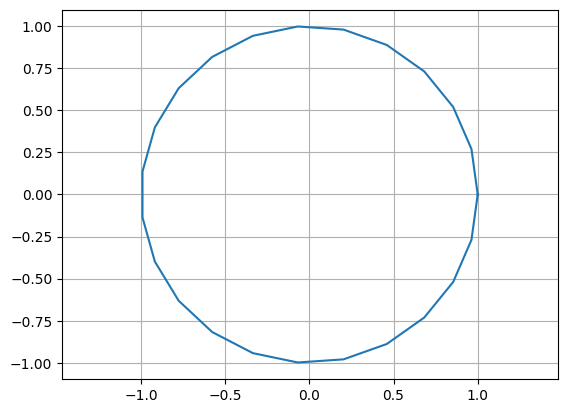

In [26]:
# Can pass array slices directly to plot
init_plot()
plt.plot(circle_points[:, 0], circle_points[:, 1]);

Now convert the points back into polar coordinates and check with the previous output.

$$ r = \sqrt{x^2 + y^2} $$
$$ \theta = \tan^{-1} \frac{y}{x} $$

In [27]:
r = np.linalg.norm(circle_points, axis=1)
print(f"radii: \n{r}")

theta = np.arctan2(circle_points[:, 1], circle_points[:, 0])
with np.printoptions(suppress=True):
    print(f"theta: \n{theta}")
    print(f"theta_deg: \n{np.rad2deg(theta)}")
# Note how numpy wraps angles so that -np.pi < angle < np.pi

radii: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
theta: 
[ 0.          0.27318197  0.54636394  0.81954591  1.09272788  1.36590985
  1.63909182  1.91227379  2.18545576  2.45863773  2.7318197   3.00500167
 -3.00500167 -2.7318197  -2.45863773 -2.18545576 -1.91227379 -1.63909182
 -1.36590985 -1.09272788 -0.81954591 -0.54636394 -0.27318197 -0.        ]
theta_deg: 
[   0.           15.65217391   31.30434783   46.95652174   62.60869565
   78.26086957   93.91304348  109.56521739  125.2173913   140.86956522
  156.52173913  172.17391304 -172.17391304 -156.52173913 -140.86956522
 -125.2173913  -109.56521739  -93.91304348  -78.26086957  -62.60869565
  -46.95652174  -31.30434783  -15.65217391   -0.        ]


In [28]:
# Only for demonstration - wrapping from 0 -> 2 np.pi instead
theta_wrapped = theta.copy()
theta_wrapped[theta_wrapped < 0] += 2*np.pi
with np.printoptions(suppress=True):
    print(f"theta_wrapped: \n{theta_wrapped}")
    print(f"ttheta_wrapped_deg: \n{np.rad2deg(theta_wrapped)}")

theta_wrapped: 
[0.         0.27318197 0.54636394 0.81954591 1.09272788 1.36590985
 1.63909182 1.91227379 2.18545576 2.45863773 2.7318197  3.00500167
 3.27818364 3.55136561 3.82454758 4.09772955 4.37091152 4.64409349
 4.91727546 5.19045743 5.4636394  5.73682137 6.01000334 6.28318531]
ttheta_wrapped_deg: 
[  0.          15.65217391  31.30434783  46.95652174  62.60869565
  78.26086957  93.91304348 109.56521739 125.2173913  140.86956522
 156.52173913 172.17391304 187.82608696 203.47826087 219.13043478
 234.7826087  250.43478261 266.08695652 281.73913043 297.39130435
 313.04347826 328.69565217 344.34782609 360.        ]


In [29]:
# For showing the difference of arctan vs arctan2
theta_0 = np.arctan(circle_points[:, 1]/circle_points[:, 0])
with np.printoptions(suppress=True):
    print(f"theta_0: \n{theta_0}")
    print(f"theta_0_deg: \n{np.rad2deg(theta_0)}")

theta_0: 
[ 0.          0.27318197  0.54636394  0.81954591  1.09272788  1.36590985
 -1.50250083 -1.22931886 -0.95613689 -0.68295492 -0.40977295 -0.13659098
  0.13659098  0.40977295  0.68295492  0.95613689  1.22931886  1.50250083
 -1.36590985 -1.09272788 -0.81954591 -0.54636394 -0.27318197 -0.        ]
theta_0_deg: 
[  0.          15.65217391  31.30434783  46.95652174  62.60869565
  78.26086957 -86.08695652 -70.43478261 -54.7826087  -39.13043478
 -23.47826087  -7.82608696   7.82608696  23.47826087  39.13043478
  54.7826087   70.43478261  86.08695652 -78.26086957 -62.60869565
 -46.95652174 -31.30434783 -15.65217391  -0.        ]


Can also write as $(r, \theta)$

In [30]:
circle_polar = np.vstack((r, theta)).T
print(f"cirlce_polar: \n{circle_polar}")

cirlce_polar: 
[[ 1.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  2.73181970e-01]
 [ 1.00000000e+00  5.46363940e-01]
 [ 1.00000000e+00  8.19545910e-01]
 [ 1.00000000e+00  1.09272788e+00]
 [ 1.00000000e+00  1.36590985e+00]
 [ 1.00000000e+00  1.63909182e+00]
 [ 1.00000000e+00  1.91227379e+00]
 [ 1.00000000e+00  2.18545576e+00]
 [ 1.00000000e+00  2.45863773e+00]
 [ 1.00000000e+00  2.73181970e+00]
 [ 1.00000000e+00  3.00500167e+00]
 [ 1.00000000e+00 -3.00500167e+00]
 [ 1.00000000e+00 -2.73181970e+00]
 [ 1.00000000e+00 -2.45863773e+00]
 [ 1.00000000e+00 -2.18545576e+00]
 [ 1.00000000e+00 -1.91227379e+00]
 [ 1.00000000e+00 -1.63909182e+00]
 [ 1.00000000e+00 -1.36590985e+00]
 [ 1.00000000e+00 -1.09272788e+00]
 [ 1.00000000e+00 -8.19545910e-01]
 [ 1.00000000e+00 -5.46363940e-01]
 [ 1.00000000e+00 -2.73181970e-01]
 [ 1.00000000e+00 -2.44929360e-16]]


Use the matrix defined earlier to transform the circle.

In [31]:
a = np.array((2.0, 1.0))
a = np.vstack((a, a[::-1]))
print(f"a: \n{a}")

a: 
[[2. 1.]
 [1. 2.]]


In [32]:
transformed_circle = (a @ circle_points.T).T
print(f"transformed_circle: \n{transformed_circle}")

transformed_circle: 
[[ 2.          1.        ]
 [ 2.19563135  1.50251083]
 [ 2.22842276  1.8935873 ]
 [ 2.09594225  2.14422507]
 [ 1.80801529  2.23583547]
 [ 1.38599611  2.16162419]
 [ 0.86118394  1.92709513]
 [ 0.2725017   1.54964223]
 [-0.33639075  1.05725946]
 [-0.92033464  0.4864646 ]
 [-1.43602151 -0.12040912]
 [-1.84520524 -0.71835265]
 [-2.11753854 -1.26301924]
 [-2.23282369 -1.71401348]
 [-2.18251053 -2.03788718]
 [-1.97033054 -2.21062011]
 [-1.61202015 -2.21940146]
 [-1.1341536  -2.06357995]
 [-0.57217206 -1.75471216]
 [ 0.03224486 -1.3157054 ]
 [ 0.63427032 -0.77911879]
 [ 1.18925486 -0.1847485 ]
 [ 1.6560378   0.42332375]
 [ 2.          1.        ]]


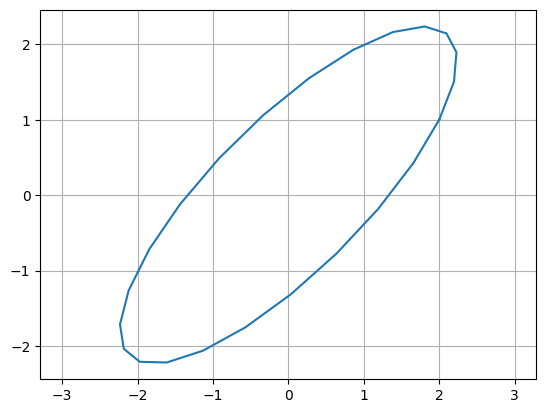

In [33]:
init_plot()
plt.plot(transformed_circle[:, 0], transformed_circle[:, 1]);

## Bonus

How do the eigenvectors and eigenvalues describe the transformation?

More on this in Mathematics for Robotics and Control.

eigenvals: 
[3. 1.]
eigenvecs: 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


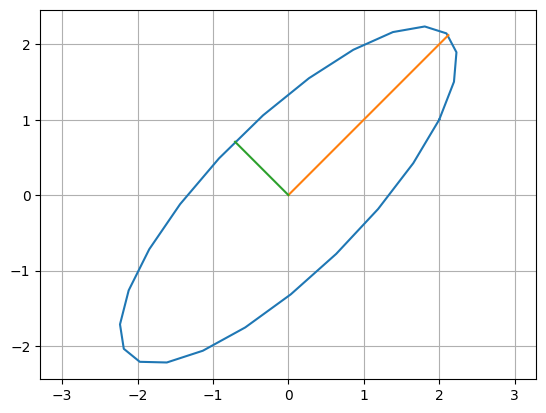

In [34]:
eigenvals, eigenvecs = np.linalg.eig(a)
print(f"eigenvals: \n{eigenvals}")
print(f"eigenvecs: \n{eigenvecs}")

init_plot()
plt.plot(transformed_circle[:, 0], transformed_circle[:, 1]);

eigenvecs = eigenvecs.T

for index, eigenvec in enumerate(eigenvecs):
    scaled_eigenvec = eigenvals[index] * eigenvec
    plot_vector(origin, scaled_eigenvec)

Make the circle 3D now.

The equations are given by
$$ x = r \sin \phi \cos \theta $$
$$ y = r \sin \phi \sin \theta $$
$$ z = r \cos \phi $$

In [35]:
phi = np.linspace(0, np.pi, points)
print(f"phi: {phi}")

phi: [0.         0.13659098 0.27318197 0.40977295 0.54636394 0.68295492
 0.81954591 0.95613689 1.09272788 1.22931886 1.36590985 1.50250083
 1.63909182 1.7756828  1.91227379 2.04886477 2.18545576 2.32204674
 2.45863773 2.59522871 2.7318197  2.86841068 3.00500167 3.14159265]


In [36]:
sphere_points = np.zeros((theta.shape[0] * phi.shape[0], 3))
print(f"sphere_3d.shape: {sphere_points.shape}")

sphere_3d.shape: (576, 3)


In [37]:
for phi_index, phi_angle in enumerate(phi):
    index = phi_index * phi.shape[0]
    sphere_points[index:index+phi.shape[0], 0] = radius * np.sin(phi_angle) * np.cos(theta)
    sphere_points[index:index+phi.shape[0], 1] = radius * np.sin(phi_angle) * np.sin(theta)
    sphere_points[index:index+phi.shape[0], 2] = radius * np.cos(phi_angle)

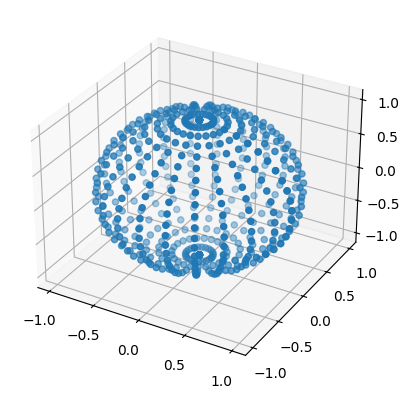

In [38]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(sphere_points[:, 0], sphere_points[:, 1], sphere_points[:, 2])
plt.show()

Transform the sphere now.

In [39]:
a_3d = np.array([
    [2, 1, 1],
    [1, 2, 1],
    [1, 1, 2],
])

transformed_sphere = (a_3d @ sphere_points.T).T

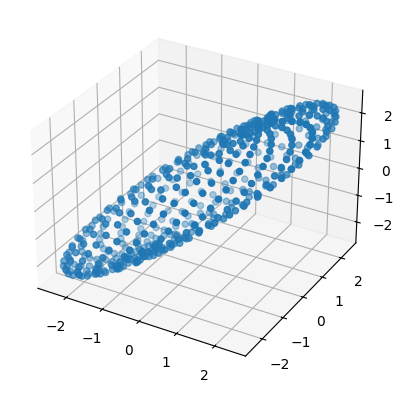

In [40]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(transformed_sphere[:, 0], transformed_sphere[:, 1], transformed_sphere[:, 2])
plt.show()

eigenvals: 
[1. 4. 1.]
eigenvecs: 
[[-0.81649658  0.57735027 -0.32444284]
 [ 0.40824829  0.57735027 -0.48666426]
 [ 0.40824829  0.57735027  0.81110711]]


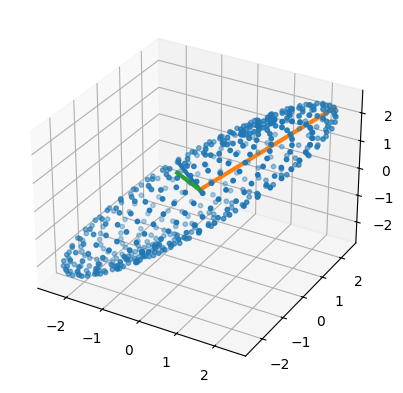

In [41]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

eigenvals, eigenvecs = np.linalg.eig(a_3d)
print(f"eigenvals: \n{eigenvals}")
print(f"eigenvecs: \n{eigenvecs}")

eigenvecs = eigenvecs.T

for index, eigenvec in enumerate(eigenvecs):
    scaled_eigenvec = eigenvals[index] * eigenvec
    ax.plot([0, scaled_eigenvec[0]], [0, scaled_eigenvec[1]], [0, scaled_eigenvec[2]], linewidth=3)

ax.scatter(transformed_sphere[:, 0], transformed_sphere[:, 1], transformed_sphere[:, 2], s=10)
plt.show()